In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("fraud_oracle.csv")

In [4]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [10]:
print(data.isnull().sum())

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [11]:
data.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [12]:
data['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [13]:
print('% of records not commited fraud = ',len(data[data['FraudFound_P']==0])/len(data)*100)
print('% of records commited fraud = ',len(data[data['FraudFound_P']==1])/len(data)*100)

% of records not commited fraud =  94.01426718547341
% of records commited fraud =  5.985732814526589


In [14]:
for i in data.columns:
    print(i, end=" ")
    if data[i].nunique()>20:
        print(f'{data[i].unique()[:10]} . . .')
    else:
        print(f'{data[i].unique()}')
    print("="*50,end="\n\n")

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth [5 3 2 4 1]

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea ['Urban' 'Rural']

DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

WeekOfMonthClaimed [1 4 2 3 5]

Sex ['Female' 'Male']

MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']

Age [21 34 47 65 27 20 36  0 30 42] . . .

Fault ['Policy Holder' 'Third Party']

PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']

VehicleCategory ['S

In [15]:
for i in data.columns:
    if i != 'FraudFound_P':
        missing_values = data[i].isna().sum() + len(data[data[i]=='none']) + len(data[data[i]=='0'])
        missing_percent = round((missing_values/len(data))*100,2)
        if missing_percent > 0:
            print(f'{i}: ',end="----------------------")
            print(f'{missing_percent}%')


DayOfWeekClaimed: ----------------------0.01%
MonthClaimed: ----------------------0.01%
Days_Policy_Accident: ----------------------0.36%
Days_Policy_Claim: ----------------------0.01%
PastNumberOfClaims: ----------------------28.22%
NumberOfSuppliments: ----------------------45.7%


In [16]:
data.drop(data[data['MonthClaimed'] == '0'].index, inplace=True)
data.drop(data[data['DayOfWeekClaimed'] == '0'].index, inplace=True)

data.drop(data[data['Days_Policy_Accident'] == 'none'].index, inplace=True)
data.drop(data[data['Days_Policy_Claim'] == 'none'].index, inplace=True)

In [17]:
data.drop(['PolicyNumber','RepNumber'],axis=1,inplace=True)

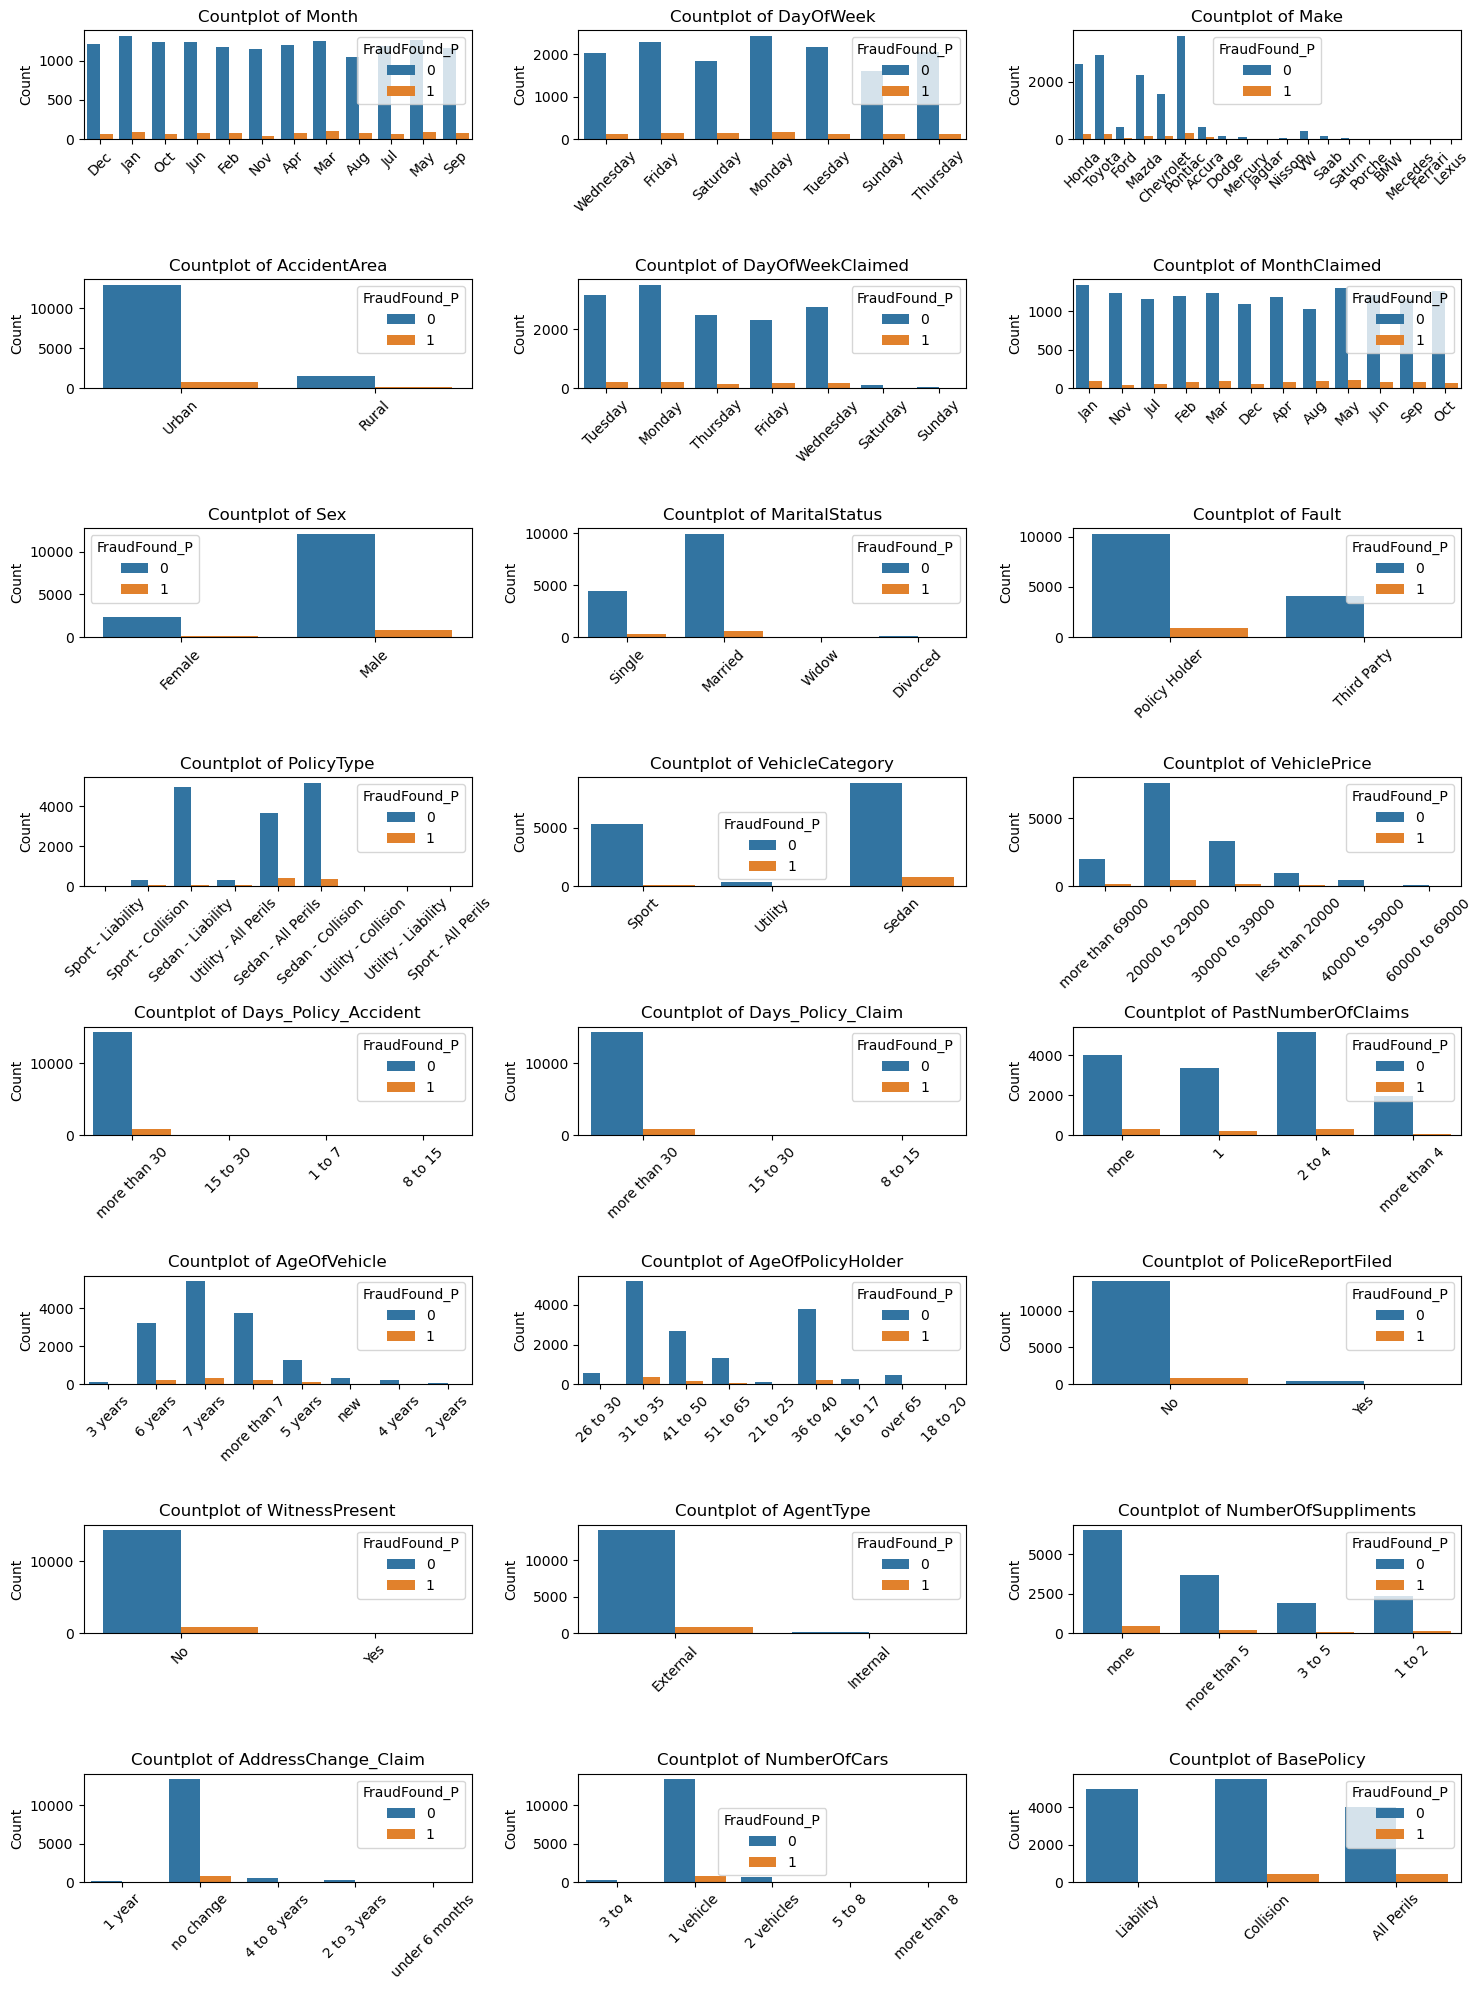

In [18]:
features = [i  for i in data.columns if data[i].dtype==object and i != 'FraudFound_P']

# Calculate the number of rows and columns for the grid
num_rows = 8
num_cols = 3

# Create subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in the subplots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=data, ax=ax,hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Hide any empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [19]:
df = data.copy(deep=True)
for feature in features:
    value_percent = round(data[feature].value_counts()/len(data)*100,2)
    values_to_remove = value_percent[value_percent <=7].index
    df = df[~df[feature].isin(values_to_remove)]
    
for feature in features:
    unique_classes = df[feature].nunique()
    if unique_classes <= 1:
        df.drop(columns=[feature], inplace=True)


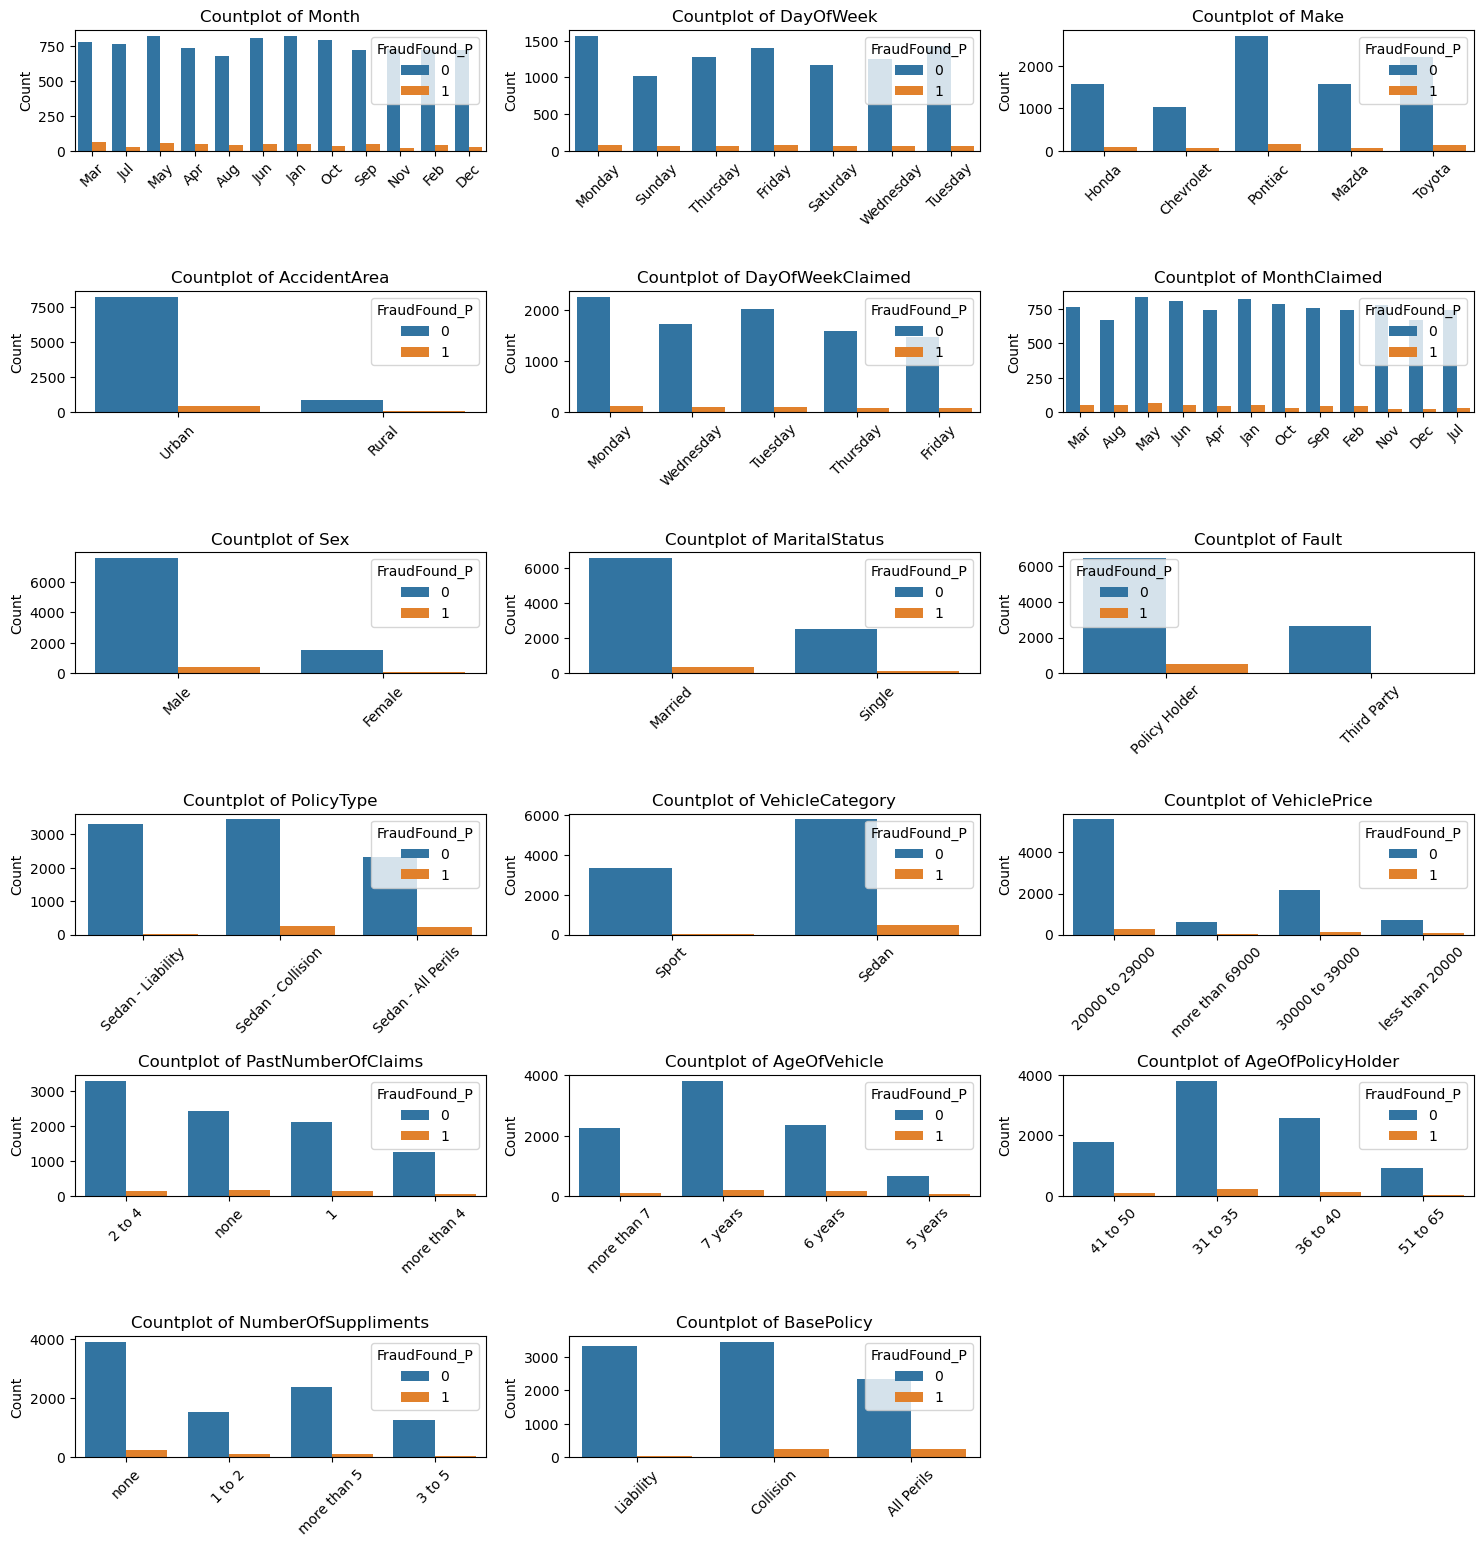

In [20]:
features = [i  for i in df.columns if df[i].dtype==object and i != 'FraudFound_P']
num_rows = 8
num_cols = 3

# Create subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Loop through features and create countplots in the subplots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.countplot(x=feature, data=df, ax=ax,hue='FraudFound_P')
    ax.set_title(f'Countplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Hide any empty subplots
for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [21]:
def feature_engineering(df):
    
    binary_features = [i for i in df.columns if df[i].nunique() == 2]

    # Initialize a LabelEncoder instance
    label_encoder = LabelEncoder()

    # Iterate through each binary feature and apply label encoding
    for feature in binary_features:
        # Fit the label encoder and transform the feature values
        df[feature] = label_encoder.fit_transform(df[feature])
        
    
    '''
    This code calculates and applies frequency encoding to the specified columns (months_weeks) 
    based on the occurrence of each category in the dataset for both classes of the target variable 
    (FraudFound_P = 1 and FraudFound_P = 0). The calculated frequency encoding values are then mapped 
    to the respective columns in the DataFrame. This technique can be used to encode categorical 
    features based on the relative frequencies of their categories in different target classes.

    '''

    # List of columns for frequency encoding
    months_weeks = ['WeekOfMonth', 'Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed']

    # Iterate through each column for frequency encoding
    for column in months_weeks:
        # Calculate the frequency of each category for FraudFound_P=1 and FraudFound_P=0
        freq_1 = df[df['FraudFound_P'] == 1].groupby(column).size() / len(df)
        freq_0 = df[df['FraudFound_P'] == 0].groupby(column).size() / len(df)

        # Calculate the frequency encoding value using the formula (15*freq_1 + freq_0) / 2
        freq_encoding = (15 * freq_1 + freq_0) / 2

        # Map the calculated frequency encoding values to the respective column in the DataFrame
        df[column] = df[column].map(freq_encoding)
        
    
    #Encoding AgeOfPolicyHolder
    age_mapping = {
        '31 to 35': 0,
        '36 to 40': 1,
        '41 to 50': 2,
        '51 to 65': 3
    }

    df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].map(age_mapping)



    #Encoding VehiclePrice
    encoding_mp = {
        '20000 to 29000': 1,
        'more than 69000': 3,
        '30000 to 39000': 2,
        'less than 20000': 0
    }
    df['VehiclePrice'] = df['VehiclePrice'].map(encoding_mp)


    #Encoding AgeOfVehicle
    age_mapping = {
        '7 years': 2,
        '6 years': 1,
        'more than 7': 3,  
        '5 years': 0
    }

    df['AgeOfVehicle'] = df['AgeOfVehicle'].map(age_mapping)


    #Encoding NumberOfSuppliments
    suppliments_mapping = {
        'none': 0,
        'more than 5': 3,
        '1 to 2': 1,
        '3 to 5': 2
    }

    df['NumberOfSuppliments'] = df['NumberOfSuppliments'].map(suppliments_mapping)


    # Encoding PastNumberOfClaims
    claim_mapping = {
        '2 to 4': 2,
        'none': 0,
        '1': 1,
        'more than 4': 3
    }

    df['PastNumberOfClaims'] = df['PastNumberOfClaims'].map(claim_mapping)

In [24]:
feature_engineering(df)

<AxesSubplot:>

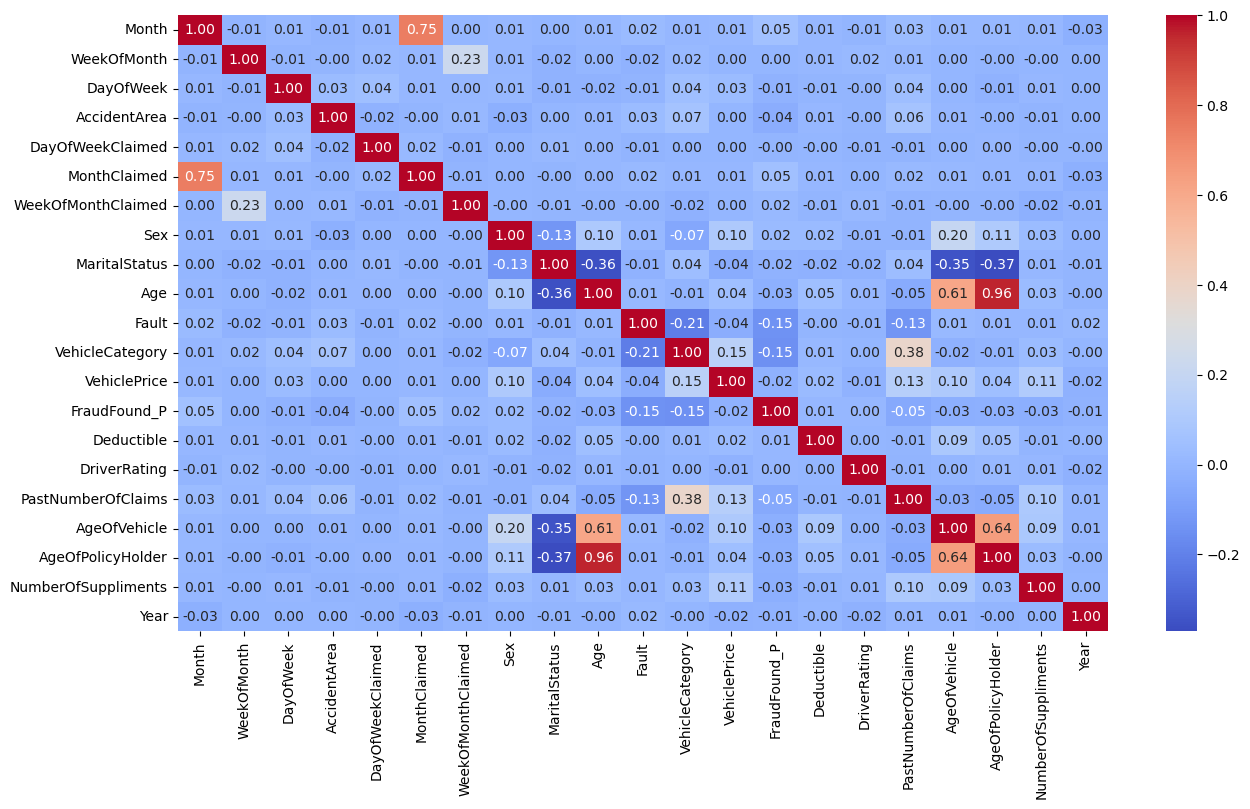

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")

In [26]:
df.drop('Age',axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation w.r.t FraudFound_P')

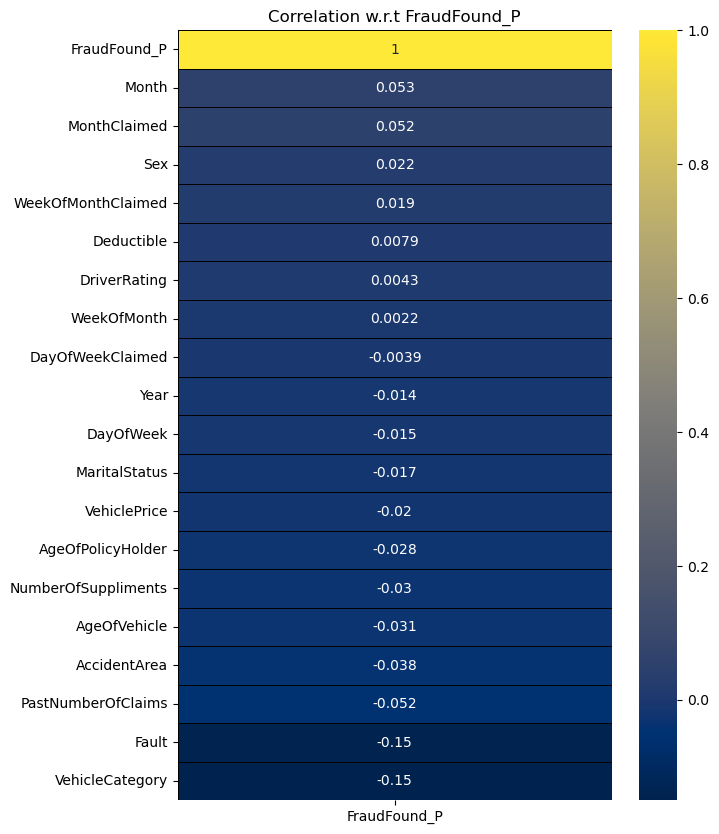

In [27]:
feautre_sel_df = df
corr = feautre_sel_df.corrwith(feautre_sel_df['FraudFound_P']).sort_values(ascending = False).to_frame()
corr.columns = ['FraudFound_P']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap='cividis',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t FraudFound_P')

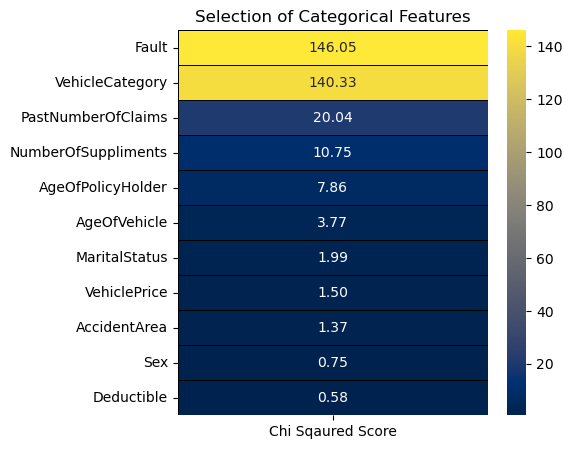

In [28]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

categorical_features = ['AgeOfPolicyHolder','VehiclePrice','AgeOfVehicle','NumberOfSuppliments','PastNumberOfClaims','AccidentArea','Sex','MaritalStatus','Fault','VehicleCategory','Deductible']
features = df.loc[:,categorical_features]
target = pd.DataFrame(df['FraudFound_P'])

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Sqaured Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Sqaured Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

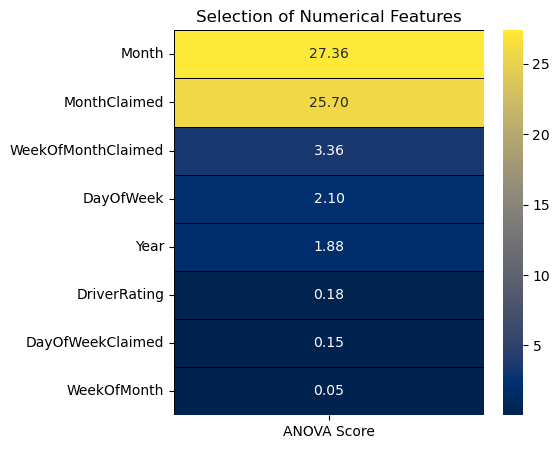

In [29]:
numerical_features = [i for i in df.columns if i not in categorical_features and i not in ['Make','PolicyType','BasePolicy','FraudFound_P']]
features = df.loc[:,numerical_features]
target = pd.DataFrame(df['FraudFound_P'])

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'cividis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [30]:
def get_final_data(df):
    df.drop(['WeekOfMonth','DayOfWeekClaimed','DriverRating','Deductible','Sex','AccidentArea','VehiclePrice','MaritalStatus','AgeOfVehicle','Make'],axis=1,inplace=True)
    df = pd.get_dummies(df,columns=['PolicyType','BasePolicy'],drop_first=True)
    return df

df = get_final_data(df)

In [31]:
df.head()

,Month,DayOfWeek,MonthClaimed,WeekOfMonthClaimed,Fault,VehicleCategory,FraudFound_P,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments,Year,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,BasePolicy_Collision,BasePolicy_Liability
11,0.088346,0.145783,0.078703,0.061086,0,1,0,2,2,0,1994,0,1,0,1
17,0.063119,0.106484,0.073074,0.197019,1,0,0,0,0,1,1994,1,0,1,0
18,0.085166,0.119202,0.093558,0.061086,0,1,0,1,0,0,1994,0,1,0,1
19,0.076827,0.145783,0.093558,0.197019,1,1,0,2,0,3,1994,0,1,0,1
20,0.076827,0.130512,0.093558,0.197019,0,1,0,1,1,3,1994,0,1,0,1


In [32]:
df.shape

(9593, 15)

In [33]:
df.reset_index(inplace=True)

In [34]:
X = df.drop(['FraudFound_P'],axis=1)
y = df['FraudFound_P']

In [35]:
y.value_counts()

0    9093
1     500
Name: FraudFound_P, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [37]:
y_train.value_counts()

0    7274
1     400
Name: FraudFound_P, dtype: int64

In [38]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [39]:
def train_classifier(X_train, y_train, X_test, y_test, sampling_technique, model, param_grid=None, class_weights=None):
    kf = StratifiedKFold(n_splits=5, shuffle=False)
    if class_weights:
        model.class_weight = class_weights
    
    if param_grid:
        clf = GridSearchCV(model, param_grid=param_grid, cv=kf, scoring='recall').fit(X_train, y_train)
    else:
        clf = model
        clf.fit(X_train,y_train)
        
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
        
    classifier_Recall = round(recall_score(y_test, y_pred) * 100, 2)
    classifier_Precision = round(precision_score(y_test, y_pred) * 100, 2)
    classifier_f1 = round(f1_score(y_test, y_pred) * 100, 2)
    classifier_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    metrics = [sampling_technique, classifier_Recall, classifier_Precision, classifier_f1, classifier_accuracy]
    
    return metrics



In [49]:

def sampling_results(X_train,y_train,X_test,y_test,model, param_grid=None):
    results = {}

    #No Sampling
    metrics = train_classifier(X_train,y_train,X_test,y_test,'No Sampling',model, param_grid)
    results[metrics[0]] = metrics[1:]

    #Cost Sensitive
    #metrics = train_classifier(X_train,y_train,X_test,y_test,'Cost Sensitive',model,param_grid,{0:1,1:18})
    #results[metrics[0]] = metrics[1:]

    #RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_over, y_over = ros.fit_resample(X_train, y_train)
    metrics = train_classifier(X_over, y_over, X_test, y_test,'RandomOverSampler',model, param_grid)
    results[metrics[0]] = metrics[1:]


    #RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_under, y_under = rus.fit_resample(X_train, y_train)
    metrics = train_classifier(X_under, y_under, X_test, y_test,'RandomUnderSampler',model, param_grid)
    results[metrics[0]] = metrics[1:]



    #SMOTE
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    metrics = train_classifier(X_smote, y_smote, X_test, y_test,'SMOTE',model, param_grid)
    results[metrics[0]] = metrics[1:]



    #TomekLinks
    tomekU = TomekLinks()
    X_underT, y_underT = tomekU.fit_resample(X_train, y_train)
    metrics = train_classifier(X_underT, y_underT, X_test, y_test,'TomekLinks',model, param_grid)
    results[metrics[0]] = metrics[1:]


    #SMOTETomek
    smoteT = SMOTETomek(random_state=42)
    X_smoteT, y_smoteT = smoteT.fit_resample(X_train, y_train)
    metrics = train_classifier(X_smoteT, y_smoteT, X_test, y_test,'SMOTETomek',model, param_grid)
    results[metrics[0]] = metrics[1:]

    # ADASYN (Adaptive Synthetic Sampling)
    adasyn = ADASYN(random_state=42)
    X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
    metrics_adasyn = train_classifier(X_adasyn, y_adasyn, X_test, y_test, 'ADASYN',model, param_grid)
    results[metrics_adasyn[0]] = metrics_adasyn[1:]

    # Borderline-SMOTE
   # borderline_smote = BorderlineSMOTE(random_state=42)
    #X_borderline, y_borderline = borderline_smote.fit_resample(X_train, y_train)
    #metrics_borderline = train_classifier(X_borderline, y_borderline, X_test, y_test, 'BorderlineSMOTE',model, param_grid)
    #results[metrics_borderline[0]] = metrics_borderline[1:]

    # SMOTE-ENN (SMOTE + Edited Nearest Neighbors)
    smote_enn = SMOTEENN(random_state=42)
    X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)
    metrics_smote_enn = train_classifier(X_smote_enn, y_smote_enn, X_test, y_test, 'SMOTEENN',model, param_grid)
    results[metrics_smote_enn[0]] = metrics_smote_enn[1:]

   # cluster_centroids = ClusterCentroids(random_state=42)
   # X_cluster, y_cluster = cluster_centroids.fit_resample(X_train, y_train)
    #metrics_cluster = train_classifier(X_cluster, y_cluster, X_test, y_test, 'ClusterCentroids',model, param_grid)
    #results[metrics_cluster[0]] = metrics_cluster[1:]

    # NearMiss
   # near_miss = NearMiss(version=1)
    #X_near_miss, y_near_miss = near_miss.fit_resample(X_train, y_train)
    #metrics_near_miss = train_classifier(X_near_miss, y_near_miss, X_test, y_test, 'NearMiss',model, param_grid)
    #results[metrics_near_miss[0]] = metrics_near_miss[1:]


    sampling_techniques = list(results.keys())
    metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
    sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
    return sorted_df

In [50]:
model = DecisionTreeClassifier(random_state=42)
dectree = sampling_results(X_train,y_train,X_test,y_test,model)
dectree

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,52.0,55.32,53.61,95.31
TomekLinks,46.0,41.82,43.81,93.85
No Sampling,44.0,43.14,43.56,94.06
SMOTE,43.0,26.71,32.95,90.88
SMOTETomek,39.0,24.22,29.89,90.46
RandomUnderSampler,86.0,16.35,27.48,76.34
SMOTEENN,40.0,18.69,25.48,87.81
ADASYN,28.0,18.42,22.22,89.79


In [51]:
model = RandomForestClassifier()
randomForest_df = sampling_results(X_train,y_train,X_test,y_test,model)
randomForest_df

,Recall,Precision,F1 Score,Accuracy
SMOTEENN,35.0,22.15,27.13,90.20
RandomUnderSampler,91.0,14.82,25.49,72.28
RandomOverSampler,13.0,44.83,20.16,94.63
ADASYN,13.0,33.33,18.71,94.11
SMOTE,11.0,32.35,16.42,94.16
SMOTETomek,11.0,28.21,15.83,93.90
TomekLinks,7.0,70.00,12.73,95.00
No Sampling,6.0,54.55,10.81,94.84


In [52]:
model = XGBClassifier()
xgb_df = sampling_results(X_train,y_train,X_test,y_test,model)
xgb_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,76.0,59.84,66.96,96.09
SMOTEENN,57.0,52.29,54.55,95.05
No Sampling,38.0,70.37,49.35,95.94
TomekLinks,39.0,65.00,48.75,95.73
SMOTE,37.0,69.81,48.37,95.88
ADASYN,36.0,70.59,47.68,95.88
SMOTETomek,36.0,69.23,47.37,95.83
RandomUnderSampler,95.0,19.23,31.99,78.95


In [53]:
model = LGBMClassifier()
lgbm_df = sampling_results(X_train,y_train,X_test,y_test,model)
lgbm_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,89.0,52.05,65.68,95.15
TomekLinks,34.0,77.27,47.22,96.04
SMOTEENN,50.0,42.74,46.08,93.90
SMOTE,29.0,70.73,41.13,95.67
SMOTETomek,29.0,70.73,41.13,95.67
No Sampling,26.0,72.22,38.24,95.62
ADASYN,24.0,72.73,36.09,95.57
RandomUnderSampler,97.0,19.60,32.61,79.10


In [54]:
model = AdaBoostClassifier()
ada_df = sampling_results(X_train,y_train,X_test,y_test,model)
ada_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,95.0,13.16,23.11,67.07
SMOTEENN,75.0,13.54,22.94,73.74
RandomUnderSampler,89.0,13.11,22.85,68.68
SMOTE,41.0,13.53,20.35,83.27
SMOTETomek,41.0,13.18,19.95,82.86
ADASYN,31.0,13.08,18.40,85.67
No Sampling,0.0,0.00,0.00,94.74
TomekLinks,0.0,0.00,0.00,94.74


In [55]:
model = EasyEnsembleClassifier(n_estimators=10, random_state=42)
esyeb_df = sampling_results(X_train,y_train,X_test,y_test,model)
esyeb_df

,Recall,Precision,F1 Score,Accuracy
SMOTEENN,72.0,14.43,24.04,76.29
RandomOverSampler,95.0,13.16,23.11,67.07
RandomUnderSampler,89.0,13.11,22.85,68.68
No Sampling,95.0,12.63,22.30,65.50
TomekLinks,96.0,12.47,22.07,64.67
SMOTE,41.0,13.53,20.35,83.27
SMOTETomek,41.0,13.18,19.95,82.86
ADASYN,31.0,13.08,18.40,85.67


In [56]:
model = BalancedRandomForestClassifier(n_estimators=10, random_state=42)
balrf_df = sampling_results(X_train,y_train,X_test,y_test,model)
balrf_df

,Recall,Precision,F1 Score,Accuracy
TomekLinks,82.0,15.30,25.79,75.40
RandomUnderSampler,83.0,15.04,25.46,74.67
No Sampling,80.0,15.01,25.28,75.35
SMOTEENN,29.0,20.14,23.77,90.31
RandomOverSampler,13.0,41.94,19.85,94.53
SMOTETomek,14.0,33.33,19.72,94.06
SMOTE,11.0,26.83,15.60,93.80
ADASYN,7.0,19.44,10.29,93.64
